<a href="https://colab.research.google.com/github/shakil155ahamad/Credit-card-froud-detection/blob/master/nlp_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train=pd.read_csv('/content/drive/My Drive/project data/nlp_train.csv')
df_test=pd.read_csv('/content/drive/My Drive/project data/nlp_test.csv')
print('here {} are rows and {} are coulmns in train'.format(df_train.shape[0],df_train.shape[1]))
print('here {} are rows and {} are coulmns in test'.format(df_test.shape[0],df_test.shape[1])) 


here 7613 are rows and 5 are coulmns in train
here 3263 are rows and 4 are coulmns in test


**EDA**

Expoletry Data anlysis
```



In [ ]:
#class wise distribution
df_disater=df_train.loc[df_train['target']==1]
df_no_disater=df_train.loc[df_train['target']==0]

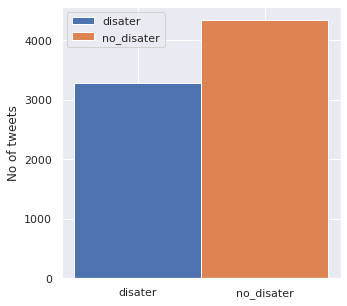

In [ ]:
fig=plt.figure(figsize=(5,5))
plt.bar(1,df_disater.shape[0],label='disater',width=0.2)
plt.bar(1+0.2,df_no_disater.shape[0],label='no_disater',width=0.2)
plt.legend()
plt.ylabel('No of tweets')
plt.xticks([1,1.2],['disater','no_disater'])
plt.show()


**No of character in tweets**

In [ ]:
def no_char(text):
  length=len(text)
  return length
df_train['length']=df_train['text'].apply(lambda x: no_char(x))
df_test['length']=df_test['text'].apply(lambda x:no_char(x)) 

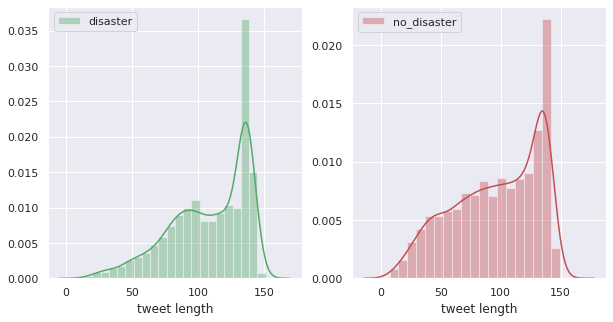

In [ ]:
fig ,(ax1,ax2) =plt.subplots(1,2,figsize=(10,5))
sns.distplot(df_train.loc[df_train['target']==1]['length'],ax=ax1,label='disaster',color='g')
ax1.legend()
ax1.set_xlabel('tweet length')
sns.distplot(df_train.loc[df_train['target']==0]['length'],ax=ax2,label='no_disaster',color='r')
ax2.set_xlabel('tweet length')
ax2.legend()
plt.show()

**No of words in a tweet**

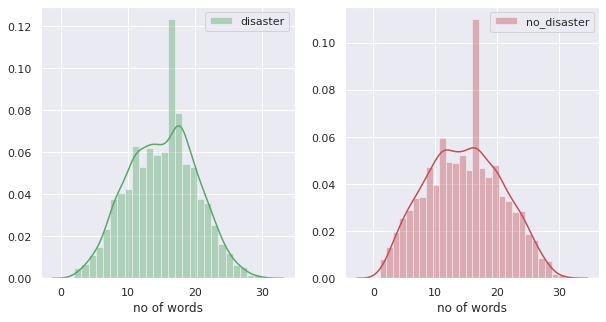

In [ ]:
fig ,(ax1,ax2) =plt.subplots(1,2,figsize=(10,5))
sns.distplot(df_train.loc[df_train['target']==1]['text'].str.split().map(lambda x : len(x)),ax=ax1,label='disaster',color='g')
ax1.set_xlabel('no of words')
ax1.legend()
sns.distplot(df_train.loc[df_train['target']==0]['text'].str.split().map(lambda x: len(x)),ax=ax2,label='no_disaster',color='r')
ax2.set_xlabel('no of words')
ax2.legend()
plt.show()

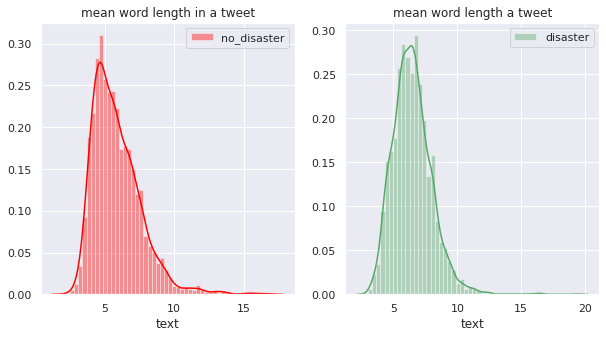

In [ ]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word_len1=df_train.loc[df_train['target']==0]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word_len1.apply(lambda x : np.mean(x)),label='no_disaster', color='red',ax=ax1)
ax1.legend()
ax1.set_title('mean word length in a tweet')
word_len2=df_train.loc[df_train['target']==1]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word_len2.apply(lambda x : np.mean(x)),label='disaster', color='g',ax=ax2)
ax2.legend()
ax2.set_title('mean word length a tweet')
plt.show()



**Stop words analysis in a tweet**

text structure analysis in tweets

In [ ]:
def corpus_df(target):
  corpus=[]
  for x in df_train.loc[df_train['target']==target]['text'].str.split():
    for i in x:
      corpus.append(i)
  return corpus    

In [ ]:
disaster_corpus=corpus_df(1)
no_disaster_corpus=corpus_df(0)

In [ ]:
#NLTK library
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#analyzing disater tweet
#stop_words analysis
def stop_words(corpus):
  stop_words=[]
  for i in corpus:
    if i in stopwords.words('english'):
      stop_words.append(i)
  return stop_words    


In [ ]:
#analyzing stopwords in  disater tweets

disaster_array=np.array(stop_words(disaster_corpus))
disaster_df =pd.DataFrame()
disaster_df['stop_words']=disaster_array
len(disaster_df['stop_words'].value_counts())

138

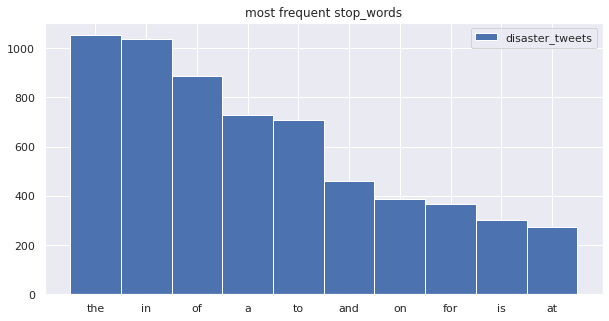

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.bar(np.arange(len(disaster_df['stop_words'].value_counts()[0:10])),disaster_df['stop_words'].value_counts()[0:10],width=1,label='disaster_tweets')
plt.xticks(np.arange(10),['the','in','of','a','to','and','on','for','is','at'])
plt.title('most frequent stop_words')
plt.legend()
plt.show()

In [ ]:
#analyzing stopwords in  non_disater tweets
no_disaster_array=np.array(stop_words(no_disaster_corpus))
no_disaster_df =pd.DataFrame()
no_disaster_df['stop_words']=no_disaster_array
no_disaster_df['stop_words'].value_counts().head(10)


the    1524
a      1115
to     1099
and     840
of      834
in      720
you     529
is      512
for     452
my      442
Name: stop_words, dtype: int64

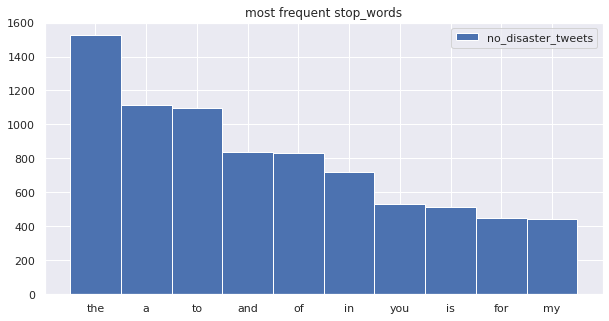

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.bar(np.arange(len(no_disaster_df['stop_words'].value_counts()[0:10])),no_disaster_df['stop_words'].value_counts()[0:10],width=1,label='no_disaster_tweets')
plt.xticks(np.arange(10),['the','a','to','and','of','in','you','is','for','my'])
plt.title('most frequent stop_words')
plt.legend()
plt.show()

In [ ]:

#punctuation analysis
def punctuation(corpus):
  punctuation=[]
  for i in corpus:
    if i in string.punctuation:
      punctuation.append(i)
  return punctuation    


In [ ]:
#disaster tweet punctuation analysis
disaster_array=np.array(punctuation(disaster_corpus))
disaster_df =pd.DataFrame()
disaster_df['punctuation']=disaster_array
disaster_df['punctuation'].value_counts().head(10)

-    389
|     51
:     31
/     18
~     14
?     11
@      9
+      7
.      7
!      6
Name: punctuation, dtype: int64

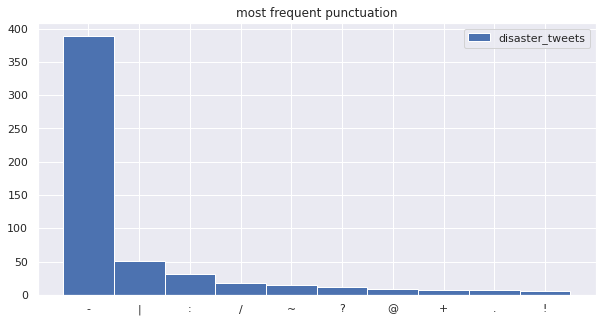

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.bar(np.arange(len(disaster_df['punctuation'].value_counts()[0:10])),disaster_df['punctuation'].value_counts()[0:10],width=1,label='disaster_tweets')
plt.xticks(np.arange(10),['-','|',':','/','~','?','@','+','.','!'])
plt.title('most frequent punctuation')
plt.legend()
plt.show()

In [ ]:
no_disaster_array=np.array(punctuation(no_disaster_corpus))
no_disaster_df =pd.DataFrame()
no_disaster_df['punctuation']=no_disaster_array
no_disaster_df['punctuation'].value_counts().head(10)

-    374
|     91
:     30
?     26
+     24
@     18
/     17
=     13
!     12
.     12
Name: punctuation, dtype: int64

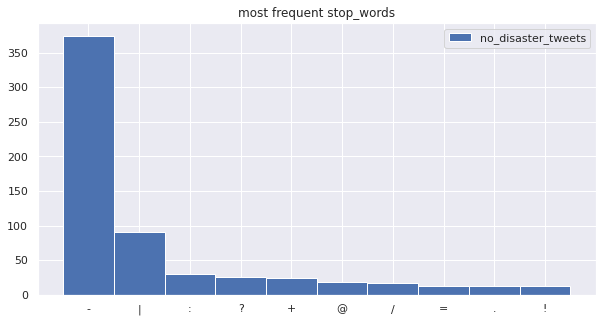

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.bar(np.arange(len(no_disaster_df['punctuation'].value_counts()[0:10])),no_disaster_df['punctuation'].value_counts()[0:10],width=1,label='no_disaster_tweets')
plt.xticks(np.arange(10),['-','|',':','?','+','@','/','=','.','!'])
plt.title('most frequent stop_words')
plt.legend()
plt.show()

Data cleaning

In [ ]:
def clean_text(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text) # rmoving urls
  text = re.sub('<.*?>+', '', text) #removing HTML tags
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)# removing punctuation marks
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  return text
df_train['text'] = df_train['text'].apply(lambda x: clean_text(x))
df_test['text'] = df_test['text'].apply(lambda x: clean_text(x))  

In [ ]:
def remove_emoji(text):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)
df_train['text'] = df_train['text'].apply(lambda x: remove_emoji(x))
df_test['text'] = df_test['text'].apply(lambda x: remove_emoji(x)) 




In [ ]:
# Wordclouds
from wordcloud import WordCloud
def corpus_clean(df,target):
  corpus_clean=[]
  for x in df.loc[df['target']==target]['text'].str.split():
    for i in x:
      corpus_clean.append(i)
  return corpus_clean    


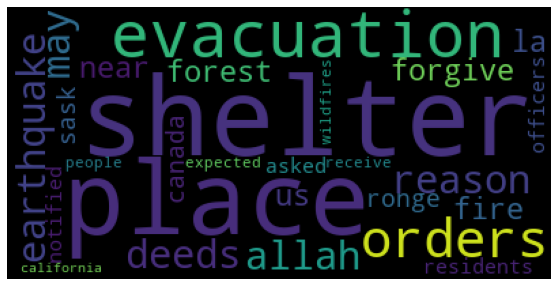

In [ ]:
#disaster_tweet wordcloud
fig=plt.figure(figsize=(10,5))
wordcloud=WordCloud(background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_clean(df_train,1)[:50]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()                         

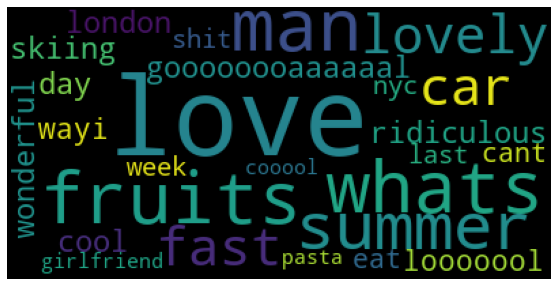

In [ ]:
#no_disaster_tweet wordcloud
fig=plt.figure(figsize=(10,5))
wordcloud=WordCloud(background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_clean(df_train,0)[:50]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show() 

In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df_train['text'] = df_train['text'].apply(lambda x: tokenizer.tokenize(x))
df_test['text'] = df_test['text'].apply(lambda x: tokenizer.tokenize(x))
df_train['text'].head()

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

In [ ]:
#Removing stopwords belonging to english language
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words


df_train['text'] = df_train['text'].apply(lambda x : remove_stopwords(x))
df_test['text'] = df_test['text'].apply(lambda x : remove_stopwords(x))
df_train.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgiv...",1,69
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1,38
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1,133
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1,65
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1,88


In [ ]:
#Takes a list of text and combines them into one large chunk of text.
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

df_train['text'] = df_train['text'].apply(lambda x : combine_text(x))
df_test['text'] = df_test['text'].apply(lambda x : combine_text(x))
df_train.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1,69
1,4,NaN,NaN,forest fire near la ronge sask canada,1,38
2,5,NaN,NaN,residents asked shelter place notified officer...,1,133
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1,65
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1,88


In [ ]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
     "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [ ]:
def convert_abbrev(word):
    return abbreviations[word] if word in abbreviations.keys() else word


In [ ]:
df_train['text']=df_train['text'].apply(lambda x:convert_abbrev(x))
df_test['text']=df_test['text'].apply(lambda x:convert_abbrev(x))

In [ ]:
df_test.head()

,id,keyword,location,text,length
0,0,NaN,NaN,happened terrible car crash,34
1,2,NaN,NaN,heard earthquake different cities stay safe ev...,64
2,3,NaN,NaN,forest fire spot pond geese fleeing across str...,96
3,9,NaN,NaN,apocalypse lighting spokane wildfires,40
4,11,NaN,NaN,typhoon soudelor kills china taiwan,45


Glove and Word2vec model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Embedding,Dropout,LSTM,GlobalMaxPooling1D,GRU,SpatialDropout1D
from tensorflow.keras.initializers import  Constant
from tensorflow.keras.models import Model

In [ ]:
train_data=df_train.drop(['keyword','location','length'],axis=1)
test_data=df_test.drop(['keyword','location','length'],axis=1)
train_data.head()

,id,text,target
0,1,deeds reason earthquake may allah forgive us,1
1,4,forest fire near la ronge sask canada,1
2,5,residents asked shelter place notified officer...,1
3,6,people receive wildfires evacuation orders cal...,1
4,7,got sent photo ruby alaska smoke wildfires pou...,1


In [ ]:
target=train_data['target']
target=target.values

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
!unzip glove*.zip

In [ ]:
!ls

In [ ]:
embedding_dict={}
with open('/content/glove.6B.50d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [ ]:
max_word_size=25000
tokenizer=Tokenizer(num_words=max_word_size)
tokenizer.fit_on_texts(train_data['text'])
sequence_train=tokenizer.texts_to_sequences(train_data['text'])
sequence_test=tokenizer.texts_to_sequences(test_data['text'])


In [ ]:
word2idx=tokenizer.word_index
v=len(word2idx)
print('number_of_words',v)

In [ ]:
data_train=pad_sequences(sequence_train,padding='post')
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

In [ ]:
from tqdm import tqdm
num_words=len(word2idx)+1
embedding_matrix=np.zeros((num_words,50))

for word, i in tqdm(word2idx.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

In [ ]:
D=50
M=200
i= Input(shape=(T,))
x=Embedding(v+1,D,embeddings_initializer=Constant(embedding_matrix),trainable=False)(i)
x=SpatialDropout1D(0.2)(x)
x=LSTM(M,return_sequences=True)(x)
x=SpatialDropout1D(0.2)(x)
x=LSTM(M,return_sequences=True)(x)
x=SpatialDropout1D(0.6)(x)
x=LSTM(M,return_sequences=True)(x)
x=SpatialDropout1D(0.6)(x)
x=GlobalMaxPooling1D()(x)
#x=Dropout(0.4)(x)
x=Dense(1024,activation='relu')(x)
#x=SpatialDropout1D(0.6)(x)
#=Dense(1024,activation='relu')(x)
x=Dropout(0.6)(x)
x=Dense(1,activation='sigmoid')(x)

model=Model(i,x)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=5,shuffle=True)
for fold,(train_ind,vald_ind) in enumerate(folds.split(data_train,target)):
  print('\n')
  print('-'*50)
  print(f'Training fold {fold + 1}')
  model.fit(data_train[train_ind],target[train_ind],validation_data=(data_train[vald_ind],target[vald_ind]),callbacks=tf.keras.callbacks.EarlyStopping(patience=2),epochs=15,batch_size=32,verbose=2)



In [ ]:
prediction=model.predict(data_test)
prediction1=prediction.round().astype(int)

In [ ]:
prediction1.shape

In [ ]:
prediction_glove=pd.DataFrame()
prediction_glove['id']=df_test['id']
prediction_glove['target']=prediction1

In [ ]:
prediction_glove

In [ ]:
predicted_data = prediction_glove.to_csv('Prediction_gloveN.csv', index = False) 
print('\nCSV String:\n', predicted_data)

BERT model

In [ ]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [ ]:
% pip install sentencepiece

In [ ]:
import tensorflow_hub as hub
import tokenization

In [ ]:
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
def build_model(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    x = Dropout(0.2)(clf_output)
    out = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=0.005), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


In [ ]:
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bert_layer = hub.KerasLayer(module_url, trainable=True)

In [ ]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
train_input = bert_encode(train_data.text.values, tokenizer, max_len=160)
test_input = bert_encode(test_data.text.values, tokenizer, max_len=160)
train_labels = train_data.target.values

In [ ]:
model_BERT = build_model(bert_layer, max_len=160)
model_BERT.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model_BERT.h5', monitor='val_loss', save_best_only=True)

train_history = model_BERT.fit(
    train_input, train_labels,
    validation_split = 0.2,
    epochs = 3, # recomended 3-5 epochs
    callbacks=[checkpoint],
    batch_size = 16
)